In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r"BTC_2018-2022.xlsx",header=0)
df.head()

,Date,open,High,Low,close,Volume,Market_cap
0,"Mar 04, 2022",42458.14,42479.61,38805.85,39137.60,28516271427,742617908335
1,"Mar 03, 2022",43925.20,44021.58,41914.75,42451.79,24967782593,805466458785
2,"Mar 02, 2022",44357.62,45077.58,43432.85,43924.12,29183112630,833361543695
3,"Mar 01, 2022",43194.50,44793.60,42952.58,44354.64,32479047645,841491170716
4,"Feb 28, 2022",37706.00,43760.46,37518.21,43193.23,35690014104,819414782676


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1523 non-null   object 
 1   open        1523 non-null   float64
 2   High        1523 non-null   float64
 3   Low         1523 non-null   float64
 4   close       1523 non-null   float64
 5   Volume      1523 non-null   int64  
 6   Market_cap  1523 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 83.4+ KB


In [4]:
df['Date']=pd.to_datetime(df['Date']) # to convert object to datetime

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1523 non-null   datetime64[ns]
 1   open        1523 non-null   float64       
 2   High        1523 non-null   float64       
 3   Low         1523 non-null   float64       
 4   close       1523 non-null   float64       
 5   Volume      1523 non-null   int64         
 6   Market_cap  1523 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 83.4 KB


In [6]:
df.isnull().sum()

Date          0
open          0
High          0
Low           0
close         0
Volume        0
Market_cap    0
dtype: int64

In [7]:
close_price=df[['Date','close']]
close_price.shape

(1523, 2)

In [8]:
close_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1523 non-null   datetime64[ns]
 1   close   1523 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.9 KB


In [9]:
close_price=close_price.set_index("Date")
close_price.head()

,close
Date,
2022-03-04,39137.60
2022-03-03,42451.79
2022-03-02,43924.12
2022-03-01,44354.64
2022-02-28,43193.23


In [10]:
y=close_price['close'].resample("d").mean()

In [11]:
print(y.shape)
y

(1523,)


Date
2018-01-02    14982.10
2018-01-03    15201.00
2018-01-04    15599.20
2018-01-05    17429.50
2018-01-06    17527.00
                ...   
2022-02-28    43193.23
2022-03-01    44354.64
2022-03-02    43924.12
2022-03-03    42451.79
2022-03-04    39137.60
Freq: D, Name: close, Length: 1523, dtype: float64

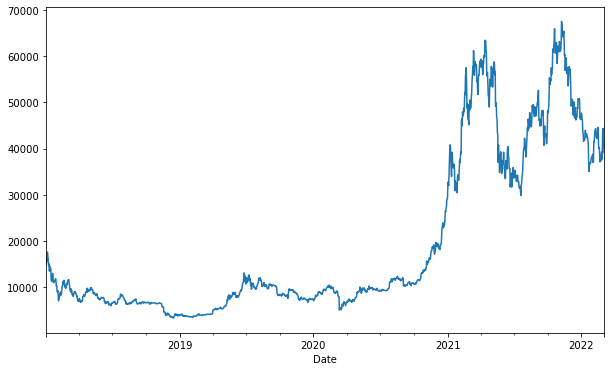

In [12]:
y.plot(figsize=(10,6))
plt.show()

In [13]:
#y=close_price['close'].resample("M").mean() # on montholy bases

In [14]:
#print(y.shape)
#y

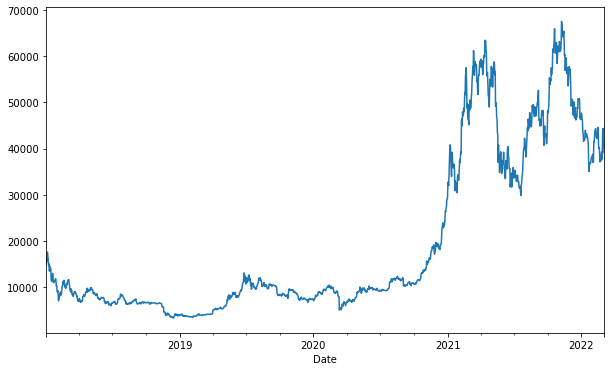

In [15]:
y.plot(figsize=(10,6))
plt.show()

In [16]:
train=y.loc[:'2020-12-31']
print(train.shape)
train

(1095,)


Date
2018-01-02    14982.10
2018-01-03    15201.00
2018-01-04    15599.20
2018-01-05    17429.50
2018-01-06    17527.00
                ...   
2020-12-27    26272.29
2020-12-28    27084.81
2020-12-29    27362.44
2020-12-30    28840.95
2020-12-31    29001.72
Freq: D, Name: close, Length: 1095, dtype: float64

In [17]:
test=y.loc['2021-01-01':]
print(test.shape)
test

(428,)


Date
2021-01-01    29374.15
2021-01-02    32127.27
2021-01-03    32782.02
2021-01-04    31971.91
2021-01-05    33992.43
                ...   
2022-02-28    43193.23
2022-03-01    44354.64
2022-03-02    43924.12
2022-03-03    42451.79
2022-03-04    39137.60
Freq: D, Name: close, Length: 428, dtype: float64

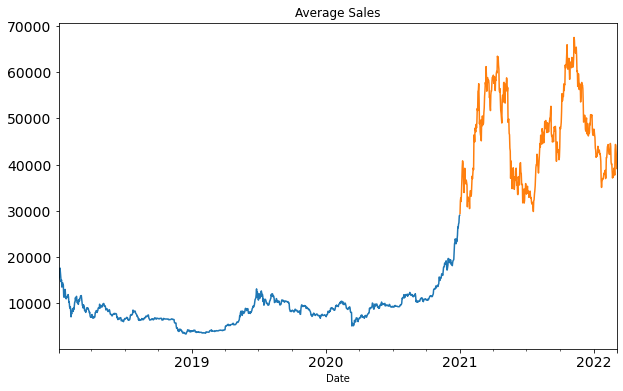

In [18]:
# plotting the data
train.plot(figsize=(10,6),title= "Average Sales", fontsize=14)
test.plot(figsize=(10,6),title= "Average Sales", fontsize=14)
plt.show()

# SimpleExpSmoothing 

C:\Users\khatr\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\khatr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


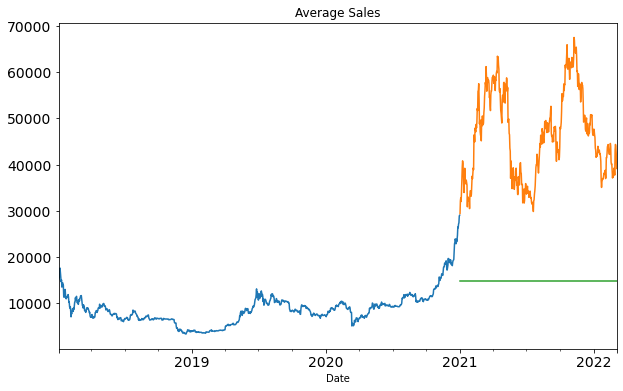

In [19]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.01)
Exp_Smooth['SES'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [20]:
Exp_Smooth.SES # predicted values

2021-01-01    14817.763435
2021-01-02    14817.763435
2021-01-03    14817.763435
2021-01-04    14817.763435
2021-01-05    14817.763435
                  ...     
2022-02-28    14817.763435
2022-03-01    14817.763435
2022-03-02    14817.763435
2022-03-03    14817.763435
2022-03-04    14817.763435
Freq: D, Length: 428, dtype: float64

In [21]:
fit1.aic # get aic value

17188.46810641161

In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test,Exp_Smooth.SES))
print(rmse)

33036.91232178042


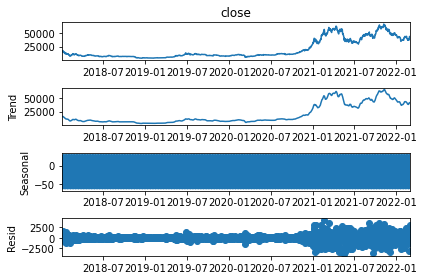

In [23]:
import statsmodels.api as sm 
decomposition=sm.tsa.seasonal_decompose(y)  # by looking on the trend and seasoniality decide which method is to apply
fig=decomposition.plot()
plt.show()

- no trend+ had seasonality holt-winter method is used

# using Holt method 

C:\Users\khatr\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\khatr\AppData\Local\Temp/ipykernel_17444/2284330733.py:8: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train).fit(smoothing_level=0.01,smoothing_slope=0.25)
C:\Users\khatr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


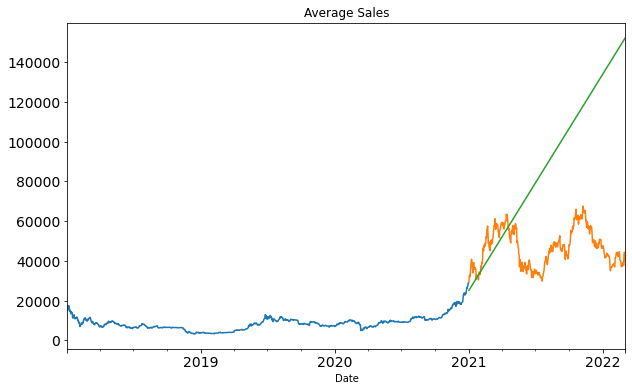

In [24]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
#smoothing level=alpha
#smoothing slope=beta
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = Holt(train).fit(smoothing_level=0.01,smoothing_slope=0.25)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [25]:
fit1.aic

16374.599069133232

In [26]:
sm.__version__

'0.12.2'

In [27]:
Holt_df['Holt_linear']

2021-01-01     25164.840390
2021-01-02     25462.829688
2021-01-03     25760.818986
2021-01-04     26058.808284
2021-01-05     26356.797582
                  ...      
2022-02-28    151214.313441
2022-03-01    151512.302739
2022-03-02    151810.292037
2022-03-03    152108.281335
2022-03-04    152406.270633
Freq: D, Length: 428, dtype: float64

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test,Holt_df.Holt_linear))
print(rmse)

56357.298388165065


# best alpha and beta value 

"""
import numpy as np
for i in np.arange(0,1,0.01):
    for j in np.arange(0,1,0.01):
        #from statsmodels.tsa.api import Holt
        Holt_df = test.copy()
        #soothing slope=beta
        fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)
        #Holt_df['Holt_linear'] = fit1.forecast(len(test))
        print(fit1.aic,i,j)
"""

# ExponentialSmoothing 

C:\Users\khatr\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\khatr\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\khatr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


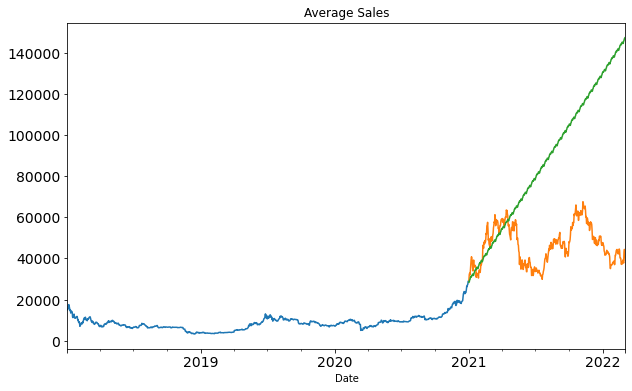

In [29]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#smoothing level=alpha
#smoothing slope=beta
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = ExponentialSmoothing(train,seasonal_periods=12,trend='add',seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [30]:
fit1.aic

13575.702866337238

In [31]:
Holt_Winter_df['Holt_Winter']

2021-01-01     28348.805922
2021-01-02     28576.155934
2021-01-03     29488.690746
2021-01-04     29785.922532
2021-01-05     30681.721331
                  ...      
2022-02-28    145894.977466
2022-03-01    146790.776265
2022-03-02    146942.725664
2022-03-03    147447.472263
2022-03-04    147159.641260
Freq: D, Length: 428, dtype: float64

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test,Holt_Winter_df.Holt_Winter))
print(rmse)

54220.52741141943


# ExponentialSmoothing for all data 

C:\Users\khatr\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\khatr\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\khatr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


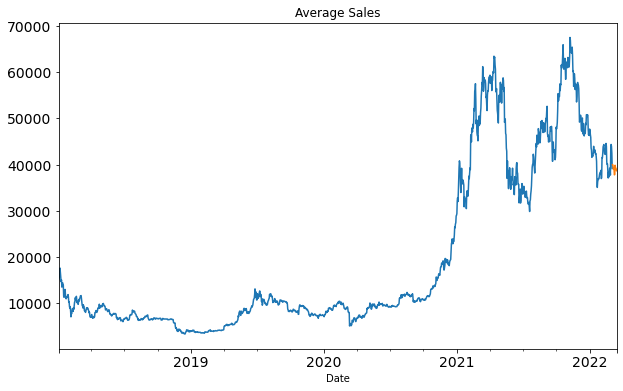

In [33]:
from statsmodels.tsa.api import ExponentialSmoothing
#seasinalperiods=gamma
fit1 = ExponentialSmoothing(y,seasonal_periods=12,trend='add',seasonal='add').fit()
#Y_predictions= fit1.predict(start=pd.to_datetime('2017-01-31'))
Y_prediction = fit1.forecast(steps=12)

y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Y_prediction.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [34]:
fit1.aic

21460.49862756827

In [35]:
Y_prediction

2022-03-05    39962.391511
2022-03-06    39909.467456
2022-03-07    39071.333332
2022-03-08    39171.594483
2022-03-09    39039.430929
2022-03-10    37757.706178
2022-03-11    37885.533090
2022-03-12    39836.544231
2022-03-13    39280.138621
2022-03-14    39212.129945
2022-03-15    39026.321922
2022-03-16    38662.262450
Freq: D, dtype: float64

# ExponentialSmoothing using predict data 

In [36]:
y.shape

(1523,)

C:\Users\khatr\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\khatr\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\khatr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


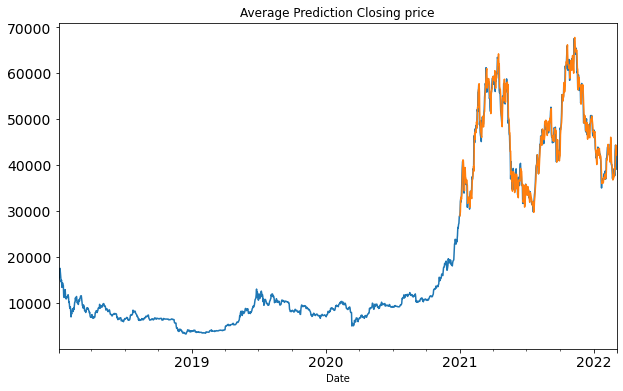

In [37]:
from statsmodels.tsa.api import ExponentialSmoothing
#seasinalperiods=gamma
fit1 = ExponentialSmoothing(y,seasonal_periods=12,trend='add',seasonal='add').fit()
Y_prediction= fit1.predict(start=pd.to_datetime('2021-01-01')) # using predict
#Y_prediction = fit1.forecast(steps=12)

y.plot(figsize=(10,6), title= 'Average Closing price', fontsize=14)
Y_prediction.plot(figsize=(10,6), title= 'Average Prediction Closing price', fontsize=14)
plt.show()

In [38]:
Y_prediction

Date
2021-01-01    28980.743898
2021-01-02    29871.699961
2021-01-03    32507.915285
2021-01-04    33078.213521
2021-01-05    32587.051910
                  ...     
2022-02-28    39166.112639
2022-03-01    42246.697683
2022-03-02    44388.743512
2022-03-03    44107.808424
2022-03-04    42242.950393
Freq: D, Length: 428, dtype: float64

In [40]:
Y_prediction.to_excel(r'TimeSeriesOutput.xlsx',index=True)

# ARIMA 

In [41]:
import pmdarima as pm # to find the best p d q values

In [42]:
"""
Box-Jenkins Method:
1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()
2.Estimation-build the model using the optimum values
3.Validation-interpret how good is the model by validation testing
4.Forecasting- forecast for future time periods
"""

'\nBox-Jenkins Method:\n1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()\n2.Estimation-build the model using the optimum values\n3.Validation-interpret how good is the model by validation testing\n4.Forecasting- forecast for future time periods\n'

In [43]:
#p+q+P+Q<=10 for max_order=10
#p+q<=3

In [44]:
model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=25441.812, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=25437.150, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=25438.060, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=25440.173, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=25442.954, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=25432.213, Time=0.55 sec
 ARIMA(1,1,0)(3,0,0)[12] intercept   : AIC=25429.732, Time=1.17 sec
 ARIMA(1,1,0)(3,0,1)[12] intercept   : AIC=25429.850, Time=2.83 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=25428.814, Time=1.12 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=25428.487, Time=0.52 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=25438.055, Time=0.21 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=25428.644, Time=1.31 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=25433.938, Time=0.48 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=3.00 sec
 ARIMA(0,1,

In [45]:
model.aic()

25425.08711525987

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train,order=(0,1,0),seasonal_order=(1,0,1,12)).fit()

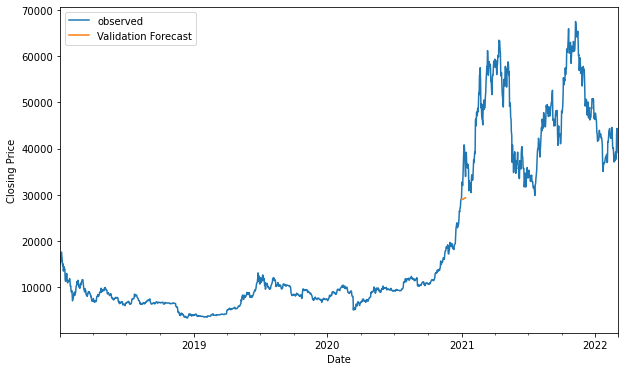

In [47]:
#pred = model.get_prediction(start=pd.to_datetime('2017-01-31')) 
pred = model.get_forecast(steps=12)

plt.figure(figsize=(10,6))
ax = y['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
plt.legend()
plt.show()

In [48]:
pred.predicted_mean

2021-01-01    28977.350294
2021-01-02    28935.340946
2021-01-03    28996.395472
2021-01-04    28962.678368
2021-01-05    28993.416405
2021-01-06    29051.232664
2021-01-07    29161.595339
2021-01-08    29151.320152
2021-01-09    29201.755845
2021-01-10    29218.914937
2021-01-11    29310.964062
2021-01-12    29320.912222
Freq: D, Name: predicted_mean, dtype: float64

In [50]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(y,order=(0,1,0),seasonal_order=(1,0,1,12)).fit()

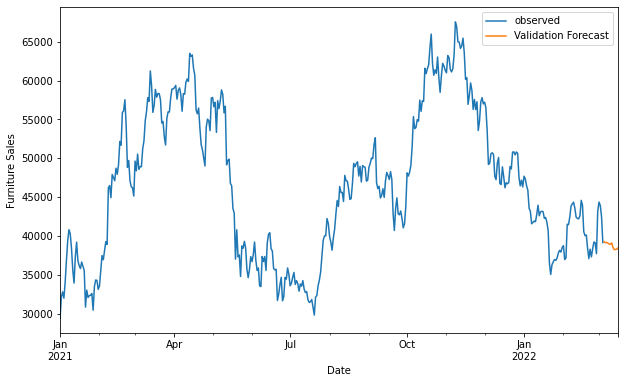

In [51]:
#pred = model.get_prediction(start=pd.to_datetime('2021-01-1')) 
pred = model.get_forecast(steps=12)

plt.figure(figsize=(10,6))
ax = y['2021':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [52]:
pred.predicted_mean.tail(12)

2022-03-05    39249.075457
2022-03-06    39112.959572
2022-03-07    39163.052743
2022-03-08    39066.892196
2022-03-09    38943.479131
2022-03-10    38915.792977
2022-03-11    39089.718851
2022-03-12    38507.154366
2022-03-13    38232.470892
2022-03-14    38246.406913
2022-03-15    38292.625770
2022-03-16    38457.248161
Freq: D, Name: predicted_mean, dtype: float64